# 一、Pandas

## 1. 导入相关包

In [1]:
import pandas as pd
import numpy as np

## 2. 导入数据

In [2]:
# 设置文件路径
file_name = r'./超级简历过去半年用户行为信息.xlsx' # r 表示不要将字符串中的 / 当作转义字符

# 读取 Excel 文件
df = pd.read_excel(file_name, sheet_name='Sheet1') # 第一个参数为文件路径，第二个参数为读取的Sheet名

type(df) # df 为二维数组 pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [3]:
# 数据导入的方式
# file_name = './file_name.xlsx'
# pd.DataFrame()
# pd.read_csv(file_name) # 从CSV⽂件导⼊数据
# pd.read_table(file_name) # 从限定分隔符的⽂本⽂件导⼊数据
# pd.read_excel(file_name) # 从Excel⽂件导⼊数据
# pd.read_sql(query, connection_object) # 从SQL表/库导⼊数据
# pd.read_json(json_string) # 从JSON格式的字符串导⼊数据
# pd.read_html(url) # 解析URL、字符串或者HTML⽂件，抽取其中的tables表格

## 3. 数据整体查看

In [4]:
df.head(5) # 读取数据的前 5 行
df.tail(5) # 读取数据的后 5 行
df.columns # 读取数据所有列的名字 ['姓名', '毕业时间', '最高学历', '学校背景', '首次付费时间', '是否付费', '意向岗位', '意向城市', '单次付费金额', '付款次数', '是否写简历', '注册时间']
df.info() # 展示数据的基本信息
df.describe() # 展示数据中数值列的统计数据
df.shape # 返回数据表的宽和高 (94, 12)
df['姓名'] # 取出“姓名”列，为一维数组

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   姓名      94 non-null     object        
 1   毕业时间    94 non-null     object        
 2   最高学历    94 non-null     object        
 3   学校背景    94 non-null     object        
 4   首次付费时间  94 non-null     datetime64[ns]
 5   是否付费    94 non-null     object        
 6   意向岗位    94 non-null     object        
 7   意向城市    94 non-null     object        
 8   单次付费金额  65 non-null     float64       
 9   付款次数    65 non-null     float64       
 10  是否写简历   94 non-null     object        
 11  注册时间    94 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 8.9+ KB


0      同学230
1      同学260
2      同学275
3      同学295
4      同学337
       ...  
89     同学778
90     同学867
91    同学1026
92    同学1027
93    同学1028
Name: 姓名, Length: 94, dtype: object

## 4. 多个 sheet 合并

In [5]:
df_dict = pd.read_excel(file_name, sheet_name=None) # sheet_name=None：读取所有sheet

type(df_dict) # 读取所有sheet时，获取的是key为sheet名，value为sheet数据的字典（对象）

df_all = pd.DataFrame()  # 创建一个空的二维数组，用于接收合并后的sheet

for i in df_dict.keys():
    df_single = pd.read_excel(file_name, sheet_name=i)  # 依次读取 df_dict 中的 sheet
    df_all = pd.concat([df_all, df_single])  # 合并 sheet

## 5. 数据清洗

### 5.1 数据填充
    将空白数据（NaN）填充为0

In [6]:
# 数组.fillna(value=content)
# 可以将数组中的空值 NaN 填充为 content
df_all['单次付费金额'] = df_all['单次付费金额'].fillna(value=0)
df_all['单次付费金额'].fillna(value=0, inplace=True) # inplace=True：将原列替换为填充好的列

### 5.2 数据替换
    将一个值替换成另一个值

In [7]:
# 数组.str.replace('原值', '新值')
# 将原值字符串替换为新值字符串
df_all['最高学历'] = df_all['最高学历'].str.replace('/', '')

### 5.3 数据筛选

In [8]:
# 选取意向城市为“北京”的数据
# 数组[筛选条件]
df_beijing = df_all[df_all['意向城市'] == '北京']

### 5.4 获取取行数据
- loc函数：通过行索引获取行数据（如获取 index 为 'a' 的行）；
- iloc函数：通过行号获取行数据（如获取第二行的数据）。

#### 5.4.1 利用loc、iloc获取行数据

In [9]:
# 创建一个 DataFrame
data=pd.DataFrame(np.arange(16).reshape(4,4),index=list('abcd'),columns=list('ABCD'))
"""
    A   B   C   D
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15
"""

# 获取索引为'a'的行
data.loc['a']
"""
    A    0
    B    1
    C    2
    D    3
    Name: a, dtype: int32
"""

# 获取第0行数据
data.iloc[0] # 从 0 开始取
"""
    A    0
    B    1
    C    2
    D    3
    Name: a, dtype: int32
"""

'\n    A    0\n    B    1\n    C    2\n    D    3\n    Name: a, dtype: int32\n'

#### 5.4.2 利用loc、iloc提取列数据

In [10]:
# 取第'A'列数据
data.loc[:,'A'] # 一个冒号代表取所有

# 取第'A'列和第'C'列数据
data.loc[:, ['A', 'C']]

# 取第'A'列到第'C'列数据
data.loc[:, 'A': 'C']

# 取第0列数据
data.iloc[:, 0]

# 取第0列和第2列的数据
data.iloc[:, [0, 2]]

# 取第0列到第2列的数据
data.iloc[:, 0: 2]

,A,B
a,0,1
b,4,5
c,8,9
d,12,13


#### 5.4.3 利用loc、iloc提取指定行、指定列数据

In [11]:
data.loc[['a','b'],['A','B']] #提取index为'a','b',列名为'A','B'中的数据
'''
       A  B
    a  0  1
    b  4  5
'''

data.iloc[[0,1],[0,1]] #提取第0、1行，第0、1列中的数据
'''
       A  B
    a  0  1
    b  4  5
'''

'\n       A  B\n    a  0  1\n    b  4  5\n'

#### 5.4.4 利用loc、iloc获取所有行

In [12]:
data.loc[:,:]

data.iloc[:,:]

,A,B,C,D
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


#### 5.4.5 利用loc函数，根据某个数据来提取数据所在的行

In [13]:
data.loc[data['A'] == 0] # 提取data数据(筛选条件: A列中数字为0所在的行数据)

,A,B,C,D
a,0,1,2,3


## 6. 数据统计

### 6.1 创建计算字段

In [14]:
df_all['单人付费总额'] = df_all['单次付费金额'] * df_all['付款次数']

### 6.2 分组统计

In [15]:
# 统计每种学历下各有多少人
# groupby(by='分组条件') 按照分组条件进行分组
# count() 统计数据有多少条，不统计空缺值
df_all.groupby(by='最高学历')['姓名'].count()

# 描述性统计：min() max() mean() medium() std() count()

最高学历
        28
专升本     34
专科      87
本科     926
硕士     229
高中       4
Name: 姓名, dtype: int64

## 7. 数据导出

In [16]:
# 将数组 df_beijing 导出到 Excel 中
df_beijing.to_excel('./超级简历过去半年用户行为数据_北京.xlsx', sheet_name='北京') #! 如果存在同名Excel文件，则会将该Excel文件清空，然后导入数据 df_beijing

## 作业

In [17]:
# 筛选毕业时间为2023年的学生
df_all[df_all['毕业时间'] == '2023年']

,姓名,毕业时间,最高学历,学校背景,首次付费时间,是否付费,意向岗位,意向城市,单次付费金额,付款次数,是否写简历,注册时间,单人付费总额
0,同学735,2023年,硕士,985/211,2022-06-10,否,数据分析师,北京,0.0,NaN,是,2022-06-10,NaN
1,同学739,2023年,硕士,985/211,2022-06-09,否,产品,北京,0.0,NaN,是,2022-06-09,NaN
2,同学766,2023年,本科,985/211,2022-06-08,否,财务,北京,0.0,NaN,是,2022-06-14,NaN
3,同学793,2023年,本科,双非,2022-06-01,否,运营,北京,0.0,NaN,是,2022-06-07,NaN
4,同学802,2023年,本科,双非,2022-05-31,否,运营,北京,0.0,NaN,是,2022-06-06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,同学1183,2023年,专升本,双非,2022-03-24,是,数据分析师,深圳,19.0,1.0,否,2022-03-25,19.0
461,同学1192,2023年,本科,双非,2022-03-24,是,法务,深圳,45.0,1.0,否,2022-03-25,45.0
462,同学1201,2023年,硕士,双非,2022-03-23,是,运营,深圳,45.0,1.0,否,2022-03-24,45.0
463,同学1228,2023年,,/,2022-03-22,是,产品,深圳,45.0,2.0,否,2022-03-23,90.0


In [18]:
# 筛选出毕业时间为2020年且意向岗位为产品的学生
df_all.loc[(df_all['毕业时间'] == '2020年') & (df_all['意向岗位'] == '产品')]

,姓名,毕业时间,最高学历,学校背景,首次付费时间,是否付费,意向岗位,意向城市,单次付费金额,付款次数,是否写简历,注册时间,单人付费总额
122,同学780,2020年,本科,双非,2022-06-07,否,产品,北京,0.0,NaN,是,2022-06-13,NaN
129,同学163,2020年,本科,海外,2022-08-05,是,产品,北京,19.0,2.0,是,2022-08-08,38.0
133,同学379,2020年,本科,双非,2022-07-14,是,产品,北京,19.0,1.0,是,2022-07-15,19.0
138,同学1306,2020年,本科,双非,2021-12-23,是,产品,北京,45.0,1.0,否,2021-12-24,45.0
371,同学732,2020年,本科,双非,2022-06-10,否,产品,广州,0.0,NaN,是,2022-06-10,NaN
373,同学764,2020年,本科,双非,2022-06-08,否,产品,广州,0.0,NaN,是,2022-06-14,NaN
374,同学827,2020年,本科,双非,2022-05-26,否,产品,广州,0.0,NaN,是,2022-06-01,NaN
379,同学242,2020年,本科,双非,2022-07-27,是,产品,非一线,99.0,1.0,是,2022-07-30,99.0
534,同学763,2020年,本科,海外,2022-06-08,否,产品,上海,0.0,NaN,是,2022-06-14,NaN
546,同学187,2020年,本科,双非,2022-08-03,是,产品,上海,19.0,2.0,是,2022-08-06,38.0


In [19]:
# 重新生成一列姓名，把姓名中的同学两字去掉，查看新生成的姓名的类型，并将其转换为另一种类型
df_all['姓名'] = df_all['姓名'].str.replace('同学', '')

df_all['姓名'].dtype # dtype('O') 类型为 object

df_all['姓名'] = pd.to_numeric(df_all['姓名'], downcast='signed')
df_all['姓名'].dtype  # 类型为 object

dtype('int16')

In [20]:
# 将未付费学生的付费金额、付费次数，填充为0，并统计不同学历学生的付费总金额
df_all['单次付费金额'].fillna(value=0, inplace=True)
df_all['付款次数'].fillna(value=0, inplace=True)

df_all['单人付费总额'] = df_all['单次付费金额'] * df_all['付款次数']
df_all.groupby(by='最高学历')['单人付费总额'].sum()
"""
    最高学历
             931.0
    专升本     2146.0
    专科      5820.0
    本科     68153.0
    硕士     17467.0
    高中       538.0
    Name: 单人付费总额, dtype: float64
"""

'\n    最高学历\n             931.0\n    专升本     2146.0\n    专科      5820.0\n    本科     68153.0\n    硕士     17467.0\n    高中       538.0\n    Name: 单人付费总额, dtype: float64\n'

# 二、数据可视化包（Matplotlib）

## 1. 基本设置

In [21]:
# 作图的代码
import matplotlib.pyplot as plt
from pylab import *  # 支持中文

# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

## 2. 统计最高学历人数

In [22]:
df_all.groupby(by='最高学历')[['姓名']].count()
df_for_draw = df_all.groupby(by='最高学历')[['姓名']].count().reset_index()

<BarContainer object of 6 artists>

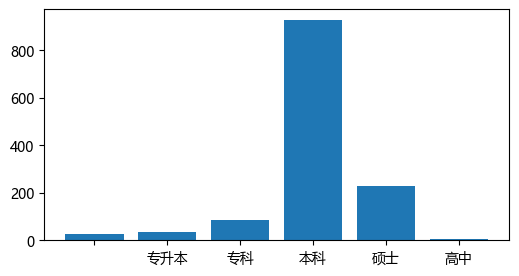

In [23]:
# 设置画布
# 画图前要先设置画布
# 默认一张画布上有一个图
fig, ax = plt.subplots(figsize=(6, 3), dpi=100) # 数值代表整个画面大小为475*230

# 一张画布上可以设置6张图
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9.5, 4.6), dpi=100)

# 柱状图
# Axes.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

x = df_for_draw['最高学历'].to_list() # 将zhu
y = df_for_draw['姓名'].to_list()
ax.bar(x, y)

# https://matplotlib.org/stable/index.html